# **Outlier Detection with Local Outlier Factor (LOF)**

* Outliers are extreme values that fall far outside the range of other observations. In data mining, machine learning, and anomaly detection, identifying outliers is crucial. The Local Outlier Factor (LOF) algorithm is an unsupervised method for detecting anomalies.
* 1 Local Density Deviation:
   * LOF computes the local density deviation of a given data point with respect to its neighbors.
   * It considers as outliers those samples that have substantially lower density than their neighbors.
* 2 Application in scikit-learn:
   * When using LOF for outlier detection, it has no predict, decision_function, or score_samples methods.
   * The parameter n_neighbors (number of neighbors considered) is typically set:
 * Greater than the minimum number of samples a cluster must contain (so that other samples can be local outliers relative to this cluster).
 * Smaller than the maximum number of nearby samples that can potentially be local outliers.
 * In practice, setting n_neighbors=20 often works well.

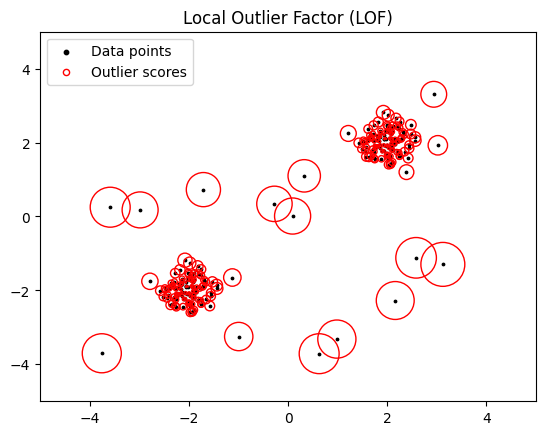

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
# Generate some outliers 
X_outliers = np.random.uniform(low=-4, high=4, size=(20,2))
X = np.r_[X_inliers, X_outliers]
n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# Fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function, and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
legend.legend_handles[0]._sizes = [10]
legend.legend_handles[1]._sizes = [20]
plt.show()

* The Local Outlier Factor (LOF) algorithm is a powerful tool for identifying outliers in datasets. It’s particularly useful when you don’t have labeled data (i.e., unsupervised learning).
* LOF computes the local density deviation of each data point with respect to its neighbors. Points with significantly lower density than their neighbors are considered outliers.
* The parameter n_neighbors determines how many neighbors to consider when calculating the local density. A higher value makes the algorithm more sensitive to local variations.
* The contamination parameter sets the proportion of expected outliers in the dataset. Adjusting this value affects the threshold for classifying points as outliers.
* The resulting outlier scores can be used to rank data points based on their deviation from the local density.
* Applications of LOF include fraud detection, network intrusion detection, and quality control.
    * Python Code Implementation:
        * In the Python code snippet we discussed, we generated synthetic data (X_inliers and X_outliers) and applied LOF.
        * The scatter plot visualizes the data points, with larger circles indicating higher outlier scores.
* Remember that this example used synthetic data; in practice, you’d apply LOF to real-world datasets.
* Matplotlib Deprecation Warnings:
    * The warning messages you encountered are related to deprecated attributes in Matplotlib.
    * To avoid these warnings, use legend_handles instead of legendHandles when customizing the legend.